In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
 
pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.options.display.max_rows = 200

In [2]:
train_df = pd.read_csv('data/train/train_tag.csv')
test_df = pd.read_csv('data/test/test_tag_b.csv')
print(train_df.shape)
print(test_df.shape)

(39923, 43)
(4000, 42)


In [3]:
# beh_pageno_cnt = pd.read_csv('data/beh_pageno_target_encoding.csv')
# print(beh_pageno_cnt.shape)
# merge_train_data = pd.merge(train_df, beh_pageno_cnt, on='id', how='left')
# print(merge_train_data.shape)
# merge_test_data = pd.merge(test_df, beh_pageno_cnt, on='id', how='left')
# print(merge_test_data.shape)

In [4]:
trd_cnt = pd.read_csv('data/trd_cnt.csv')
print(trd_cnt.shape)

(35183, 6)


In [5]:
# merge_train_data = pd.merge(merge_train_data, trd_cnt, on='id', how='left')
# print(merge_train_data.shape)
# merge_test_data = pd.merge(merge_test_data, trd_cnt, on='id', how='left')
# print(merge_test_data.shape)
merge_train_data = pd.merge(train_df, trd_cnt, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(test_df, trd_cnt, on='id', how='left')
print(merge_test_data.shape)

(39923, 48)
(4000, 47)


In [6]:
trd_amt = pd.read_csv('data/trd_amount.csv')
print(trd_amt.shape)

(35183, 7)


In [7]:
merge_train_data = pd.merge(merge_train_data, trd_amt, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, trd_amt, on='id', how='left')
print(merge_test_data.shape)

(39923, 54)
(4000, 53)


In [8]:
trd_cod1_cnt = pd.read_csv('data/trd_cod1_cnt.csv')
print(trd_cod1_cnt.shape)
merge_train_data = pd.merge(merge_train_data, trd_cod1_cnt, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, trd_cod1_cnt, on='id', how='left')
print(merge_test_data.shape)

(35183, 8)
(39923, 61)
(4000, 60)


In [9]:
trd_flg3_cnt = pd.read_csv('data/trd_flg3_cnt.csv')
print(trd_flg3_cnt.shape)
merge_train_data = pd.merge(merge_train_data, trd_flg3_cnt, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, trd_flg3_cnt, on='id', how='left')
print(merge_test_data.shape)

(35183, 8)
(39923, 68)
(4000, 67)


In [10]:
beh_feature_train_pred = pd.read_csv('data/beh_feature_train_pred.csv')
beh_feature_test_pred = pd.read_csv('data/beh_feature_test_pred.csv')
print(beh_feature_train_pred.shape)
print(beh_feature_test_pred.shape)
merge_train_data = pd.merge(merge_train_data, beh_feature_train_pred, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, beh_feature_test_pred, on='id', how='left')
print(merge_test_data.shape)

(11913, 2)
(1232, 2)
(39923, 69)
(4000, 68)


In [11]:
beh_feature_train_pred_mean = pd.read_csv('data/beh_feature_train_pred_mean.csv')
beh_feature_test_pred_mean = pd.read_csv('data/beh_feature_test_pred_mean.csv')
merge_train_data = pd.merge(merge_train_data, beh_feature_train_pred_mean, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, beh_feature_test_pred_mean, on='id', how='left')
print(merge_test_data.shape)

(39923, 70)
(4000, 69)


In [12]:
beh_feature_train_pred_sum = pd.read_csv('data/beh_feature_train_pred_sum.csv')
beh_feature_test_pred_sum = pd.read_csv('data/beh_feature_test_pred_sum.csv')
merge_train_data = pd.merge(merge_train_data, beh_feature_train_pred_sum, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, beh_feature_test_pred_sum, on='id', how='left')
print(merge_test_data.shape)

(39923, 71)
(4000, 70)


In [13]:
trd_feature_train_pred = pd.read_csv('data/trd_feature_train_pred.csv')
trd_feature_test_pred = pd.read_csv('data/trd_feature_test_pred.csv')
merge_train_data = pd.merge(merge_train_data, trd_feature_train_pred, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, trd_feature_test_pred, on='id', how='left')
print(merge_test_data.shape)

(39923, 72)
(4000, 71)


In [14]:
trd_feature_train_pred_mean = pd.read_csv('data/trd_feature_train_pred_mean.csv')
trd_feature_test_pred_mean = pd.read_csv('data/trd_feature_test_pred_mean.csv')
merge_train_data = pd.merge(merge_train_data, trd_feature_train_pred_mean, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, trd_feature_test_pred_mean, on='id', how='left')
print(merge_test_data.shape)

(39923, 73)
(4000, 72)


In [15]:
trd_feature_train_pred_sum = pd.read_csv('data/trd_feature_train_pred_sum.csv')
trd_feature_test_pred_sum = pd.read_csv('data/trd_feature_test_pred_sum.csv')
merge_train_data = pd.merge(merge_train_data, trd_feature_train_pred_sum, on='id', how='left')
print(merge_train_data.shape)
merge_test_data = pd.merge(merge_test_data, trd_feature_test_pred_sum, on='id', how='left')
print(merge_test_data.shape)

(39923, 74)
(4000, 73)


In [16]:
merge_train_data.isnull().sum()

id                                     0
flag                                   0
gdr_cd                                 0
age                                    0
mrg_situ_cd                            0
edu_deg_cd                         12436
acdm_deg_cd                            1
deg_cd                             20963
job_year                               0
ic_ind                                 0
fr_or_sh_ind                           0
dnl_mbl_bnk_ind                        0
dnl_bind_cmb_lif_ind                   0
hav_car_grp_ind                        0
hav_hou_grp_ind                        0
l6mon_agn_ind                          0
frs_agn_dt_cnt                         0
vld_rsk_ases_ind                       0
fin_rsk_ases_grd_cd                    0
confirm_rsk_ases_lvl_typ_cd            0
cust_inv_rsk_endu_lvl_cd               0
l6mon_daim_aum_cd                      0
tot_ast_lvl_cd                         0
pot_ast_lvl_cd                         0
bk1_cur_year_mon

In [17]:
merge_test_data.isnull().sum()

id                                    0
gdr_cd                                0
age                                   0
mrg_situ_cd                           0
edu_deg_cd                         1247
acdm_deg_cd                           0
deg_cd                             2069
job_year                              0
ic_ind                                0
fr_or_sh_ind                          0
dnl_mbl_bnk_ind                       0
dnl_bind_cmb_lif_ind                  0
hav_car_grp_ind                       0
hav_hou_grp_ind                       0
l6mon_agn_ind                         0
frs_agn_dt_cnt                        0
vld_rsk_ases_ind                      0
fin_rsk_ases_grd_cd                   0
confirm_rsk_ases_lvl_typ_cd           0
cust_inv_rsk_endu_lvl_cd              0
l6mon_daim_aum_cd                     0
tot_ast_lvl_cd                        0
pot_ast_lvl_cd                        0
bk1_cur_year_mon_avg_agn_amt_cd       0
l12mon_buy_fin_mng_whl_tms            0


In [18]:
train_df = merge_train_data
test_df = merge_test_data

In [19]:
test_df

,id,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,...,trd_flg3_cnt,trd_flg3_A_percent,trd_flg3_B_percent,trd_flg3_C_percent,beh_pred,beh_pred_mean,beh_pred_sum,trd_pred,trd_pred_mean,trd_pred_sum
0,U1E63A3,M,40,B,C,31,NaN,1,0,1,...,31.00000,0.00000,1.00000,0.00000,nan,nan,nan,0.39351,0.25660,7.95464
1,U3EC77F,M,46,A,C,31,NaN,3,0,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,U27DC0C,M,42,B,F,G,NaN,3,0,0,...,34.00000,0.38235,0.61765,0.00000,0.23599,0.15978,10.86477,0.37167,0.15335,5.21401
3,U3FAAAC,F,35,B,B,30,NaN,5,0,1,...,100.00000,1.00000,0.00000,0.00000,0.23575,0.15320,9.95801,0.33339,0.14751,14.75058
4,U04EA0B,M,34,A,F,G,NaN,9,0,0,...,132.00000,0.89394,0.07576,0.03030,0.19327,0.15237,20.41699,0.45063,0.15319,20.22057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,U0FBFE2,F,58,B,B,30,A,29,0,0,...,6.00000,1.00000,0.00000,0.00000,nan,nan,nan,0.20418,0.13091,0.78546
3996,U506AD2,M,50,B,C,31,~,25,0,0,...,3.00000,1.00000,0.00000,0.00000,0.16572,0.12955,3.23887,0.12773,0.12422,0.37265
3997,U287B33,M,39,A,Z,Z,~,0,1,1,...,5.00000,1.00000,0.00000,0.00000,0.16151,0.14973,2.24594,0.21774,0.12836,0.64179
3998,U15134F,M,34,A,B,30,~,2,0,0,...,10.00000,0.50000,0.50000,0.00000,0.16091,0.13766,2.47794,0.38324,0.17644,1.76435


In [20]:
def age_cd(age):
    age_str = ""
    if age >= 18 and age < 24 :
        age_str = "18-24"
    elif age >= 24 and age < 30 :
        age_str = "24-30"
    elif age >= 30 and age < 40 :
        age_str = "30-40"
    elif age >= 40 and age < 50 :
        age_str = "40-50"
    elif age >= 50 and age < 60 :
        age_str = "50-60"
    elif age >= 60 :
        age_str = ">=60"
    else :
        age_str = "<18"
    return age_str

In [21]:
train_df['age']=train_df['age'].apply(lambda x : age_cd(x))
test_df['age']=test_df['age'].apply(lambda x : age_cd(x))

In [22]:
train_df['age&gdr'] = train_df['age'] + train_df['gdr_cd']
test_df['age&gdr'] = test_df['age'] + test_df['gdr_cd']
train_df['age&gdr']

0        40-50M
1        30-40M
2        50-60M
3        40-50F
4        40-50F
          ...  
39918    24-30M
39919    40-50M
39920    24-30M
39921    30-40M
39922    30-40M
Name: age&gdr, Length: 39923, dtype: object

In [23]:
train_target = train_df['flag']
test_id = test_df['id']
train_df.drop(['flag','id'], axis = 1, inplace=True)
test_df.drop(['id'], axis = 1, inplace=True)

In [24]:
print(train_df.shape)
print(test_df.shape)

(39923, 73)
(4000, 73)


In [25]:
train_df.columns

Index(['gdr_cd', 'age', 'mrg_situ_cd', 'edu_deg_cd', 'acdm_deg_cd', 'deg_cd',
       'job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind',
       'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
       'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind',
       'fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd',
       'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd', 'tot_ast_lvl_cd',
       'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd',
       'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
       'l12_mon_insu_buy_whl_tms', 'l12_mon_gld_buy_whl_tms', 'loan_act_ind',
       'pl_crd_lmt_cd', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
       'hld_crd_card_grd_cd', 'crd_card_act_ind',
       'l1y_crd_card_csm_amt_dlm_cd', 'atdd_type', 'perm_crd_lmt_cd',
       'cur_debit_cnt', 'cur_credit_cnt', 'cur_debit_min_opn_dt_cnt',
       'cur_credit_min_opn_dt_cnt', 'cur_debit_crd_lvl', 'flg1_trd_cnt_B',
       'flg1_trd_cnt_C', 'trd_cnt', 'flg1_trd_cnt_B_precen

In [26]:
train_df.dtypes

gdr_cd                              object
age                                 object
mrg_situ_cd                         object
edu_deg_cd                          object
acdm_deg_cd                         object
deg_cd                              object
job_year                            object
ic_ind                              object
fr_or_sh_ind                        object
dnl_mbl_bnk_ind                     object
dnl_bind_cmb_lif_ind                object
hav_car_grp_ind                     object
hav_hou_grp_ind                     object
l6mon_agn_ind                       object
frs_agn_dt_cnt                      object
vld_rsk_ases_ind                    object
fin_rsk_ases_grd_cd                 object
confirm_rsk_ases_lvl_typ_cd         object
cust_inv_rsk_endu_lvl_cd            object
l6mon_daim_aum_cd                    int64
tot_ast_lvl_cd                      object
pot_ast_lvl_cd                      object
bk1_cur_year_mon_avg_agn_amt_cd      int64
l12mon_buy_

In [27]:
def order_object_replace(col, val):
    train_df[col].replace({'\\N': val}, inplace = True)
    train_df[col] = train_df[col].astype('int64')
    test_df[col].replace({'\\N': val}, inplace = True)
    test_df[col] = test_df[col].astype('int64')

In [28]:
order_object_cols = ['job_year', 'frs_agn_dt_cnt', 'fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd',
                    'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'l12mon_buy_fin_mng_whl_tms', 
                     'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms',
                    'l12_mon_gld_buy_whl_tms', 'ovd_30d_loan_tot_cnt',
                    'his_lng_ovd_day', 'hld_crd_card_grd_cd',
                    'l1y_crd_card_csm_amt_dlm_cd']

for col in order_object_cols:
    print(col)
    order_object_replace(col, -1)

job_year
frs_agn_dt_cnt
fin_rsk_ases_grd_cd
confirm_rsk_ases_lvl_typ_cd
cust_inv_rsk_endu_lvl_cd
tot_ast_lvl_cd
pot_ast_lvl_cd
l12mon_buy_fin_mng_whl_tms
l12_mon_fnd_buy_whl_tms
l12_mon_insu_buy_whl_tms
l12_mon_gld_buy_whl_tms
ovd_30d_loan_tot_cnt
his_lng_ovd_day
hld_crd_card_grd_cd
l1y_crd_card_csm_amt_dlm_cd


In [29]:
ind_object_cols = ['ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind',
       'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
       'l6mon_agn_ind', 'vld_rsk_ases_ind', 'loan_act_ind',
       'crd_card_act_ind']

for col in ind_object_cols:
    print(col)
    order_object_replace(col, 0)

ic_ind
fr_or_sh_ind
dnl_mbl_bnk_ind
dnl_bind_cmb_lif_ind
hav_car_grp_ind
hav_hou_grp_ind
l6mon_agn_ind
vld_rsk_ases_ind
loan_act_ind
crd_card_act_ind


In [30]:
train_df['deg_cd'].value_counts()

~     17050
\N      736
A       543
B       332
Z       171
C       118
D        10
Name: deg_cd, dtype: int64

In [31]:
train_df['edu_deg_cd'].fillna('\\N', inplace=True)
train_df['deg_cd'].fillna('\\N', inplace=True)
train_df['atdd_type'].fillna('\\N', inplace=True)
train_df['acdm_deg_cd'].fillna('\\N', inplace=True)

In [32]:
test_df['edu_deg_cd'].fillna('\\N', inplace=True)
test_df['deg_cd'].fillna('\\N', inplace=True)
test_df['atdd_type'].fillna('\\N', inplace=True)

In [33]:
train_df.replace({b'\N': 'None'}, inplace = True)
test_df.replace({b'\N': 'None'}, inplace = True)
train_df.replace({'\\N': 'None'}, inplace = True)
test_df.replace({'\\N': 'None'}, inplace = True)

In [34]:
test_df.replace({'atdd_type': 0.0}, '0', inplace=True)
test_df.replace({'atdd_type': 1.0}, '1', inplace=True)

In [35]:
from sklearn import preprocessing

label_object_cols = ['age', 'gdr_cd','mrg_situ_cd', 'edu_deg_cd', 'acdm_deg_cd', 'deg_cd','age&gdr', 'atdd_type']

for col in label_object_cols:
    print(col)
    le = preprocessing.LabelEncoder()
    le.fit(list(train_df[col]) + list(test_df[col]))
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

age
gdr_cd
mrg_situ_cd
edu_deg_cd
acdm_deg_cd
deg_cd
age&gdr
atdd_type


In [36]:
train_df.dtypes

gdr_cd                               int64
age                                  int64
mrg_situ_cd                          int64
edu_deg_cd                           int64
acdm_deg_cd                          int64
deg_cd                               int64
job_year                             int64
ic_ind                               int64
fr_or_sh_ind                         int64
dnl_mbl_bnk_ind                      int64
dnl_bind_cmb_lif_ind                 int64
hav_car_grp_ind                      int64
hav_hou_grp_ind                      int64
l6mon_agn_ind                        int64
frs_agn_dt_cnt                       int64
vld_rsk_ases_ind                     int64
fin_rsk_ases_grd_cd                  int64
confirm_rsk_ases_lvl_typ_cd          int64
cust_inv_rsk_endu_lvl_cd             int64
l6mon_daim_aum_cd                    int64
tot_ast_lvl_cd                       int64
pot_ast_lvl_cd                       int64
bk1_cur_year_mon_avg_agn_amt_cd      int64
l12mon_buy_

In [37]:
test_df.dtypes

gdr_cd                               int64
age                                  int64
mrg_situ_cd                          int64
edu_deg_cd                           int64
acdm_deg_cd                          int64
deg_cd                               int64
job_year                             int64
ic_ind                               int64
fr_or_sh_ind                         int64
dnl_mbl_bnk_ind                      int64
dnl_bind_cmb_lif_ind                 int64
hav_car_grp_ind                      int64
hav_hou_grp_ind                      int64
l6mon_agn_ind                        int64
frs_agn_dt_cnt                       int64
vld_rsk_ases_ind                     int64
fin_rsk_ases_grd_cd                  int64
confirm_rsk_ases_lvl_typ_cd          int64
cust_inv_rsk_endu_lvl_cd             int64
l6mon_daim_aum_cd                    int64
tot_ast_lvl_cd                       int64
pot_ast_lvl_cd                       int64
bk1_cur_year_mon_avg_agn_amt_cd      int64
l12mon_buy_

In [38]:
test_df.isnull().sum()

gdr_cd                                0
age                                   0
mrg_situ_cd                           0
edu_deg_cd                            0
acdm_deg_cd                           0
deg_cd                                0
job_year                              0
ic_ind                                0
fr_or_sh_ind                          0
dnl_mbl_bnk_ind                       0
dnl_bind_cmb_lif_ind                  0
hav_car_grp_ind                       0
hav_hou_grp_ind                       0
l6mon_agn_ind                         0
frs_agn_dt_cnt                        0
vld_rsk_ases_ind                      0
fin_rsk_ases_grd_cd                   0
confirm_rsk_ases_lvl_typ_cd           0
cust_inv_rsk_endu_lvl_cd              0
l6mon_daim_aum_cd                     0
tot_ast_lvl_cd                        0
pot_ast_lvl_cd                        0
bk1_cur_year_mon_avg_agn_amt_cd       0
l12mon_buy_fin_mng_whl_tms            0
l12_mon_fnd_buy_whl_tms               0


In [39]:
test_df['atdd_type'].value_counts()

2    2356
0    1529
1     115
Name: atdd_type, dtype: int64

In [40]:
n_splits = 20
random_state = 2020
# np.random.seed(random_state)
splits = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state).split(train_df, train_target))

cols = list(train_df.columns)
feature_importance_df = pd.DataFrame()
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

In [41]:
xgb_param = {
    "objective" : "binary:logistic",
    "eval_metric" : "auc",
    "max_depth" : 7,
    "learning_rate" : 0.05,
    "bagging_seed" : random_state,
    "seed": random_state,
    'gpu_id':3,
    'tree_method': 'gpu_hist',
    'min_child_weight': 80
}
test_data_M = xgb.DMatrix(test_df, feature_names=cols)

for i, (train_idx, valid_idx) in enumerate(splits):
    print('Folder', i)
    x_tr, y_tr = train_df.iloc[train_idx], train_target.iloc[train_idx]
    x_valid, y_valid = train_df.iloc[valid_idx], train_target.iloc[valid_idx]
    
    train_data = xgb.DMatrix(x_tr, label=y_tr, feature_names=cols)
    valid_data = xgb.DMatrix(x_valid, label=y_valid, feature_names=cols)
    
    num_round = 100000
   
    clf = xgb.train(xgb_param, train_data, num_round, [(valid_data, 'eval')], early_stopping_rounds=2000, verbose_eval=1000)
    
    print(f'best score {clf.best_score}')
    print(f'best_iteration {clf.best_iteration}')
    
    oof[valid_idx] = clf.predict(valid_data, ntree_limit=clf.best_ntree_limit)
    predictions += clf.predict(test_data_M, ntree_limit=clf.best_ntree_limit) / n_splits
    
    del x_tr
    del y_tr

print(metrics.roc_auc_score(train_target.values, oof))

Folder 0


/opt/anaconda3/envs/ctr/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	eval-auc:0.751507
Will train until eval-auc hasn't improved in 2000 rounds.
[1000]	eval-auc:0.792869
[2000]	eval-auc:0.789919
Stopping. Best iteration:
[970]	eval-auc:0.793042

best score 0.793042
best_iteration 970
Folder 1
[0]	eval-auc:0.748357
Will train until eval-auc hasn't improved in 2000 rounds.
[1000]	eval-auc:0.776603
[2000]	eval-auc:0.77213
Stopping. Best iteration:
[419]	eval-auc:0.778882

best score 0.778882
best_iteration 419
Folder 2
[0]	eval-auc:0.743733
Will train until eval-auc hasn't improved in 2000 rounds.
[1000]	eval-auc:0.772784
[2000]	eval-auc:0.765628
Stopping. Best iteration:
[111]	eval-auc:0.777544

best score 0.777544
best_iteration 111
Folder 3
[0]	eval-auc:0.739981
Will train until eval-auc hasn't improved in 2000 rounds.
[1000]	eval-auc:0.782692
[2000]	eval-auc:0.777251
Stopping. Best iteration:
[615]	eval-auc:0.785563

best score 0.785563
best_iteration 615
Folder 4
[0]	eval-auc:0.725356
Will train until eval-auc hasn't improved in 2000 rounds.
[1000

In [42]:
import os

with open(os.path.join('result','xgboost_oof_test_77061.txt'), 'w+') as f:
    for tid, pred in zip(test_id, predictions):
        f.write('{}\t{}\n'.format(tid, pred))

In [43]:
submission = pd.DataFrame({'ID': test_id, 'flag': predictions})
oof = pd.DataFrame({'flag': oof})

In [44]:
submission.to_csv('./xgboost_oof_test_77061.csv', index = False)
oof.to_csv('./xgboost_oof_train_77061.csv')

In [158]:
%qt

UsageError: Line magic function `%qt` not found.


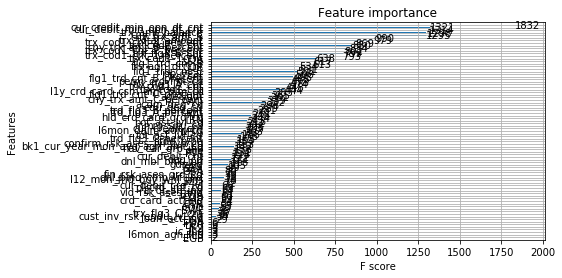

In [157]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(clf)
pyplot.show()